In [1]:
import pandas as pd
import csv


In [2]:
# Define the column names for the CSV
column_names = ['SP', 'Sentence1', 'Sentence2', '(Human ratings of semantic similarity)', 'S']

# Open the text file for reading
with open('/content/Human Ratings_wo_cols.txt', 'r') as input_file:

    # Initialize a list to hold the rows of data for the CSV
    csv_data = []

    # Initialize a list to hold the current row of data
    current_row = []

    # Loop through each line in the input file
    for line in input_file:

        # Strip any leading/trailing whitespace
        line = line.strip()

        # If the line is not empty, append it to the current row of data
        if line:
            current_row.append(line)
            #print(current_row)

        # If the line is empty and there are 5 fields in the current row, append it to the csv_data list
        if len(current_row) == 5:
            csv_data.append(current_row)
            current_row = []

    # If there are 5 fields in the current row after processing all lines, append it to the csv_data list
    if len(current_row) == 5:
        csv_data.append(current_row)

# Write the CSV file
with open('output_csv.csv', 'w', newline='') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(column_names)
    csv_writer.writerows(csv_data)

In [3]:
df = pd.read_csv("/content/output_csv.csv")

In [4]:
df.head()

,SP,Sentence1,Sentence2,(Human ratings of semantic similarity),S
0,66,Would you like to go out to drink with me toni...,I really don't know what to eat tonight so I m...,1.01,0.77
1,67,I advise you to treat this matter very serious...,"You must take this most seriously, it will aff...",3.38,0.69
2,68,When I was going out to meet my friends there ...,The train operator announced to the passengers...,3.13,0.68
3,69,"Does music help you to relax, or does it distr...",Does this sponge look wet or dry to you?,0.10,0.29
4,70,You must realise that you will definitely be p...,He will be harshly punished for setting the fi...,2.84,0.87


In [5]:
len(df)

66

In [6]:
print("Average STD is: " + str(df['S'].mean()))
print("Max STD is: " + str(max(df['S'])))
print("Min STD is: " + str(min(df['S'])))

Average STD is: 0.6956060606060607
Max STD is: 1.09
Min STD is: 0.16


In [7]:
print("Average similarity is: " + str(df['(Human ratings of semantic similarity)'].mean()))
print("Max similarity is: " + str(max(df['(Human ratings of semantic similarity)'])))
print("Min similarity is: " + str(min(df['(Human ratings of semantic similarity)'])))

Average similarity is: 2.0234848484848484
Max similarity is: 3.96
Min similarity is: 0.08


In [8]:
df.rename(columns = {'(Human ratings of semantic similarity)':'Human ratings (1-4)'}, inplace = True)

In [9]:
df.head(2)

,SP,Sentence1,Sentence2,Human ratings (1-4),S
0,66,Would you like to go out to drink with me toni...,I really don't know what to eat tonight so I m...,1.01,0.77
1,67,I advise you to treat this matter very serious...,"You must take this most seriously, it will aff...",3.38,0.69


### let's normalize human ratings on a scale of 0-1 incl.

In [10]:
# Normalize the Human Rating column
min_value = 0
max_value = 4
df['Human Rating (0-1)'] = (df['Human ratings (1-4)'] - min_value) / (max_value - min_value)

In [11]:
# df.head()

In [12]:
df.drop('Human ratings (1-4)', axis = 1, inplace = True)

In [13]:
df.columns

Index(['SP', 'Sentence1', 'Sentence2', 'S', 'Human Rating (0-1)'], dtype='object')

In [ ]:
# df = df['SP', 'Sentence1', 'Sentence2','Human Rating (0-1)', 'S']

In [14]:
df.head()

,SP,Sentence1,Sentence2,S,Human Rating (0-1)
0,66,Would you like to go out to drink with me toni...,I really don't know what to eat tonight so I m...,0.77,0.2525
1,67,I advise you to treat this matter very serious...,"You must take this most seriously, it will aff...",0.69,0.8450
2,68,When I was going out to meet my friends there ...,The train operator announced to the passengers...,0.68,0.7825
3,69,"Does music help you to relax, or does it distr...",Does this sponge look wet or dry to you?,0.29,0.0250
4,70,You must realise that you will definitely be p...,He will be harshly punished for setting the fi...,0.87,0.7100


In [15]:
df.to_excel("Excel_output.xlsx")  

In [41]:
df.to_csv('Eval_Dataset', index=False)

In [16]:
pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.8 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=51c2fcd776f3897c86abdc35e350d6420f2266b3bd3615fc611bad2b8c6c061a
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [17]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
for i in range(len(df)):
    sentences = []
    sentences.append(df.iloc[:,1][i])
    sentences.append(df.iloc[:,2][i])
    #print(sentences)

In [19]:
model1 = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')
model2 = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
model3 = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')
model4 = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
model5 = SentenceTransformer('sentence-transformers/all-distilroberta-v1')
model6 = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
model7 = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')

In [20]:
model1_sim = []
for i in range(len(df)):
    sentences = []
    sentences.append(df.iloc[:,1][i])
    sentences.append(df.iloc[:,2][i])
    embeddings = model1.encode(sentences)
    score = cosine_similarity(embeddings[[0]],embeddings[[1]])#[0]
    s = score.tolist()       
    model1_sim.append(s[0][0]) 

In [21]:
model2_sim = []
for i in range(len(df)):
    sentences = []
    sentences.append(df.iloc[:,1][i])
    sentences.append(df.iloc[:,2][i])
    embeddings = model2.encode(sentences)
    score = cosine_similarity(embeddings[[0]],embeddings[[1]])#[0]
    s = score.tolist()       
    model2_sim.append(s[0][0]) 

In [22]:
model3_sim = []
for i in range(len(df)):
    sentences = []
    sentences.append(df.iloc[:,1][i])
    sentences.append(df.iloc[:,2][i])
    embeddings = model3.encode(sentences)
    score = cosine_similarity(embeddings[[0]],embeddings[[1]])#[0]
    s = score.tolist()       
    model3_sim.append(s[0][0]) 

In [23]:
model4_sim = []
for i in range(len(df)):
    sentences = []
    sentences.append(df.iloc[:,1][i])
    sentences.append(df.iloc[:,2][i])
    embeddings = model4.encode(sentences)
    score = cosine_similarity(embeddings[[0]],embeddings[[1]])#[0]
    s = score.tolist()       
    model4_sim.append(s[0][0]) 

In [24]:
model5_sim = []
for i in range(len(df)):
    sentences = []
    sentences.append(df.iloc[:,1][i])
    sentences.append(df.iloc[:,2][i])
    embeddings = model5.encode(sentences)
    score = cosine_similarity(embeddings[[0]],embeddings[[1]])#[0]
    s = score.tolist()       
    model5_sim.append(s[0][0]) 

In [25]:
model6_sim = []
for i in range(len(df)):
    sentences = []
    sentences.append(df.iloc[:,1][i])
    sentences.append(df.iloc[:,2][i])
    embeddings = model6.encode(sentences)
    score = cosine_similarity(embeddings[[0]],embeddings[[1]])#[0]
    s = score.tolist()       
    model6_sim.append(s[0][0]) 

In [26]:
model7_sim = []
for i in range(len(df)):
    sentences = []
    sentences.append(df.iloc[:,1][i])
    sentences.append(df.iloc[:,2][i])
    embeddings = model7.encode(sentences)
    score = cosine_similarity(embeddings[[0]],embeddings[[1]])#[0]
    s = score.tolist()       
    model7_sim.append(s[0][0]) 

In [27]:
sim_data = pd.DataFrame(list(zip(model1_sim, model2_sim, model3_sim, model4_sim, model5_sim, model6_sim, model7_sim )),
               columns =['model1_sim','model2_sim','model3_sim','model4_sim','model5_sim','model6_sim','model7_sim'])

In [28]:
final_df = pd.concat([df, sim_data], axis= 1)

In [29]:
final_df.head()

,SP,Sentence1,Sentence2,S,Human Rating (0-1),model1_sim,model2_sim,model3_sim,model4_sim,model5_sim,model6_sim,model7_sim
0,66,Would you like to go out to drink with me toni...,I really don't know what to eat tonight so I m...,0.77,0.2525,0.574561,0.401688,0.604909,0.556527,0.446287,0.487809,0.464361
1,67,I advise you to treat this matter very serious...,"You must take this most seriously, it will aff...",0.69,0.8450,0.847708,0.623459,0.606210,0.720132,0.548065,0.526409,0.533209
2,68,When I was going out to meet my friends there ...,The train operator announced to the passengers...,0.68,0.7825,0.795110,0.610298,0.580120,0.618650,0.600126,0.575597,0.606999
3,69,"Does music help you to relax, or does it distr...",Does this sponge look wet or dry to you?,0.29,0.0250,0.434532,0.081748,0.070333,0.037349,0.028277,0.154332,0.180915
4,70,You must realise that you will definitely be p...,He will be harshly punished for setting the fi...,0.87,0.7100,0.848330,0.586308,0.578369,0.662019,0.592620,0.616853,0.652445


In [30]:
final_df.columns

Index(['SP', 'Sentence1', 'Sentence2', 'S', 'Human Rating (0-1)', 'model1_sim',
       'model2_sim', 'model3_sim', 'model4_sim', 'model5_sim', 'model6_sim',
       'model7_sim'],
      dtype='object')

In [31]:
# assuming df is your dataframe with all the similarity scores
human_rating = final_df['Human Rating (0-1)']
model_sims = df.iloc[:, 5:]

In [32]:
# calculate correlation matrix
corr_matrix = final_df.drop(['SP', 'Sentence1', 'Sentence2', 'S'],axis=1).corr()

In [33]:
# model1 = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')
# model2 = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# model3 = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')
# model4 = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
# model5 = SentenceTransformer('sentence-transformers/all-distilroberta-v1')
# model6 = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
# model7 = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')

In [34]:
corr_matrix

,Human Rating (0-1),model1_sim,model2_sim,model3_sim,model4_sim,model5_sim,model6_sim,model7_sim
Human Rating (0-1),1.000000,0.837749,0.918121,0.905663,0.922735,0.922343,0.912979,0.926704
model1_sim,0.837749,1.000000,0.805193,0.842965,0.872415,0.833792,0.836639,0.809857
model2_sim,0.918121,0.805193,1.000000,0.955995,0.949246,0.972353,0.967505,0.985463
model3_sim,0.905663,0.842965,0.955995,1.000000,0.979567,0.957247,0.947678,0.955026
model4_sim,0.922735,0.872415,0.949246,0.979567,1.000000,0.960090,0.945159,0.946102
model5_sim,0.922343,0.833792,0.972353,0.957247,0.960090,1.000000,0.980818,0.974935
model6_sim,0.912979,0.836639,0.967505,0.947678,0.945159,0.980818,1.000000,0.976238
model7_sim,0.926704,0.809857,0.985463,0.955026,0.946102,0.974935,0.976238,1.000000


In [35]:
human_rating_corr = corr_matrix.loc["Human Rating (0-1)"]
model_corrs = human_rating_corr.drop("Human Rating (0-1)").sort_values(ascending = False)
print("Models in ascending order of correlation with 'Human Rating (0-1)':")
for model, corr in model_corrs.iteritems():
    print(f"{model}: {corr:.3f}")


Models in ascending order of correlation with 'Human Rating (0-1)':
model7_sim: 0.927
model4_sim: 0.923
model5_sim: 0.922
model2_sim: 0.918
model6_sim: 0.913
model3_sim: 0.906
model1_sim: 0.838


### We are using **model3**  and **model2** respectively


1.   model3: paraphrase-MiniLM-L6-v2 **Rank 6**
2.   model2: all-MiniLM-L6-v2 **Rank 4**      

### 3 best performing models based on complete dataset are:

1.   model7: all-MiniLM-L12-v2 **Rank 1**
2.   model4: paraphrase-multilingual-MiniLM-L12-v2 **Rank 2**
3.   model5: all-distilroberta-v1 **Rank 3**



In [36]:
# model7 = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
# model4 = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
# model5 = SentenceTransformer('sentence-transformers/all-distilroberta-v1')
# model2 = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# model6 = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
# model3 = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')
# model1 = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')




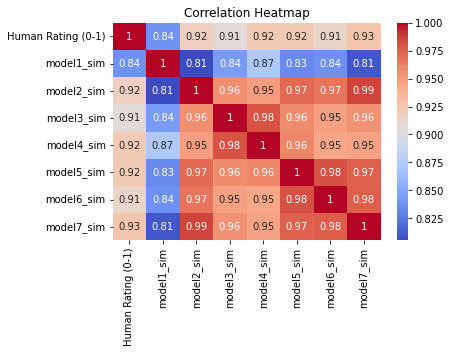

In [37]:
# plot correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
dict = {'model1_sim': 'model1',
        'model2_sim': 'model2',
        'model3_sim': 'model3',
        'model4_sim': 'model4',
        'model5_sim': 'model5',
        'model6_sim': 'model6',
        'model7_sim': 'model7'
        }

final_df.rename(columns=dict,
          inplace=True)

In [ ]:
final_df.head()

,SP,Sentence1,Sentence2,S,Human Rating (0-1),model1,model2,model3,model4,model5,model6,model7
0,66,Would you like to go out to drink with me toni...,I really don't know what to eat tonight so I m...,0.77,0.2525,0.574561,0.401688,0.604909,0.556527,0.446287,0.487809,0.464361
1,67,I advise you to treat this matter very serious...,"You must take this most seriously, it will aff...",0.69,0.8450,0.847708,0.623459,0.606210,0.720132,0.548065,0.526409,0.533209
2,68,When I was going out to meet my friends there ...,The train operator announced to the passengers...,0.68,0.7825,0.795110,0.610298,0.580120,0.618650,0.600126,0.575597,0.606999
3,69,"Does music help you to relax, or does it distr...",Does this sponge look wet or dry to you?,0.29,0.0250,0.434532,0.081748,0.070333,0.037349,0.028277,0.154332,0.180915
4,70,You must realise that you will definitely be p...,He will be harshly punished for setting the fi...,0.87,0.7100,0.848330,0.586308,0.578369,0.662019,0.592620,0.616853,0.652445


## Variance Distribution

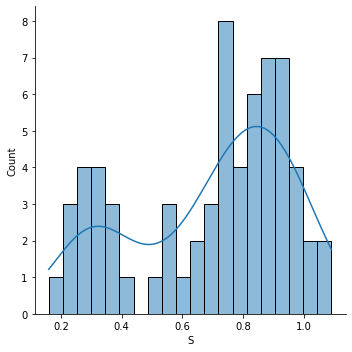

In [ ]:
sns.displot(final_df['S'], bins = 20, kde = True)

## Human Similarity Score Distribution

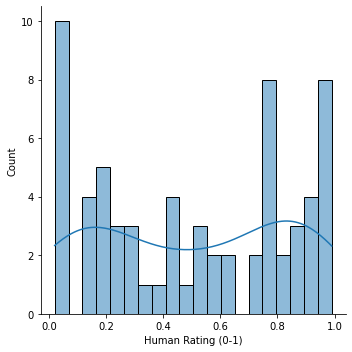

In [ ]:
sns.displot(final_df['Human Rating (0-1)'], bins = 20, kde = True)

In [ ]:
# model_columns = ['model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7']

# # loop through each model column and plot against human ratings
# for column in model_columns:
#     sns.regplot(x='Human Rating (0-1)', y=column, data=final_df)
#     plt.show()